In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [ ]:
# 현재경로 확인
os.getcwd()

In [2]:
# 데이터 불러오기
ploan = pd.read_csv("../00_Data/Personal Loan.csv")
"""
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 
"""
display(ploan.head())

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis=1, inplace = False)

In [4]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.0,46,22,70,4,1.9,1,212,0,0,0,0,1
2496,1.0,63,37,32,3,0.7,2,141,0,0,0,0,0
2497,1.0,33,9,14,3,0.9,3,114,0,0,0,0,0
2498,1.0,38,14,111,2,6.1,1,326,0,0,0,0,0


### 설명변수(x), 타겟변수(y) 분리 및 학습데이터와 평가데이터

In [5]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 0 or 1

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3, random_state=43)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 로지스틱회귀모형 모델링 y=f(x)

In [7]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.131418
         Iterations 9


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.6019
Time:                        15:09:51   Log-Likelihood:                -229.98
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                5.481e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0363      0.098      0.369      0.712      -0.156       0.229
CCAvg                  0.0955      0.065      1.479      0.139      -0.031       0.222
CD Account             3.9098      0.554      7.056      0.000       2.824       4.996
CreditCard            -1.1032      0.343     -3.215      0.001      -1.776      -0.431
Education              1.6276      0.192      8.479      0.000       1.251       2.004
Experience            -0.0179      0.098     -0.184      0.854      -0.209       0.173
Family                 0.7356      0.126      5.828      0.000       0.488       0.983
Income                 0.0526      0.004     12.507      0.000       0.044       0.061
Mortgage              -0.0002      0.001     -0.264      0.792      -0.002       0.002
Online                -0.4549      0.259     -1.753      0.080      -0.963       0.054
Securities Account    -1.3229      0.529     -2.502      0.012      -2.359      -0.287
const                -14.2217      2.704     -5.259      0.000     -19.521      -8.922
======================================================================================
"""

In [9]:
# Performance measure
print("model AIC:","{:5f}".format(results.aic))

model AIC: 483.964368


In [10]:
results.params

Age                    0.036329
CCAvg                  0.095452
CD Account             3.909774
CreditCard            -1.103234
Education              1.627562
Experience            -0.017899
Family                 0.735604
Income                 0.052575
Mortgage              -0.000240
Online                -0.454944
Securities Account    -1.322927
const                -14.221651
dtype: float64

In [11]:
## 나이가 한살 많을수록록 대출할 확률이 1.03 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임

np.exp(results.params)

Age                   1.036997e+00
CCAvg                 1.100156e+00
CD Account            4.988767e+01
CreditCard            3.317962e-01
Education             5.091449e+00
Experience            9.822598e-01
Family                2.086741e+00
Income                1.053982e+00
Mortgage              9.997601e-01
Online                6.344836e-01
Securities Account    2.663545e-01
const                 6.662164e-07
dtype: float64

In [12]:
pred_y = results.predict(test_x)
pred_y

1791    0.299658
307     0.002507
2494    0.000926
1129    0.053940
229     0.000865
          ...   
619     0.052573
857     0.012480
110     0.000956
1850    0.000363
2333    0.007956
Length: 750, dtype: float64

In [13]:
def cut_off(y, threshold):
    Y = y.copy() # copy함수를 사용해 이전 y값이 변하지 않게 방지
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return Y.astype(int)

pred_Y = cut_off(pred_y, 0.5)
pred_Y

1791    0
307     0
2494    0
1129    0
229     0
       ..
619     0
857     0
110     0
1850    0
2333    0
Length: 750, dtype: int64

In [14]:
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[669   4]
 [ 32  45]]


In [15]:
# accuracy
print((cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat))

def acc(cfmat):
    acc = (cfmat[0, 0] + cfmat[1, 1]) / np.sum(cfmat)
    return acc

print(acc(cfmat))

0.952
0.952


### 임계값(Cut-off)에 따른 성능지표 비교

In [16]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
    
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.896000
0.2,0.930667
0.3,0.949333
0.4,0.957333
0.5,0.952000
0.6,0.949333
0.7,0.945333
0.8,0.937333


AUC: 0.9391559406418247


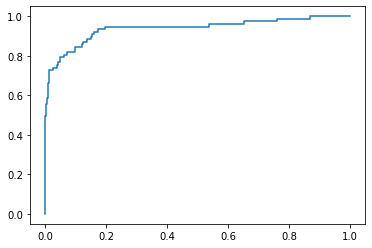

In [17]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# ROC curve
plt.plot(fpr, tpr)

# AUC
auc = np.trapz(tpr, fpr)
print('AUC:', auc)

In [18]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [19]:
train_x2, test_x2, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [20]:
model = sm.Logit(train_y, train_x2)
results2 = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [21]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.6029
Time:                        15:11:11   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Tue, 22 Nov 2022   Pseudo R-squ.:                  0.6019
Time:                        15:11:13   Log-Likelihood:                -229.98
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                5.481e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0363      0.098      0.369      0.712      -0.156       0.229
CCAvg                  0.0955      0.065      1.479      0.139      -0.031       0.222
CD Account             3.9098      0.554      7.056      0.000       2.824       4.996
CreditCard            -1.1032      0.343     -3.215      0.001      -1.776      -0.431
Education              1.6276      0.192      8.479      0.000       1.251       2.004
Experience            -0.0179      0.098     -0.184      0.854      -0.209       0.173
Family                 0.7356      0.126      5.828      0.000       0.488       0.983
Income                 0.0526      0.004     12.507      0.000       0.044       0.061
Mortgage              -0.0002      0.001     -0.264      0.792      -0.002       0.002
Online                -0.4549      0.259     -1.753      0.080      -0.963       0.054
Securities Account    -1.3229      0.529     -2.502      0.012      -2.359      -0.287
const                -14.2217      2.704     -5.259      0.000     -19.521      -8.922
======================================================================================
"""

In [23]:
pred_y = results2.predict(test_x2)
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

In [24]:
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

# accuracy
acc(cfmat)

[[660  13]
 [ 29  48]]


0.944

In [25]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
    
table.index.name = 'threshold'
table.columns.name = 'performance'
table

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC: 0.9465467667547905


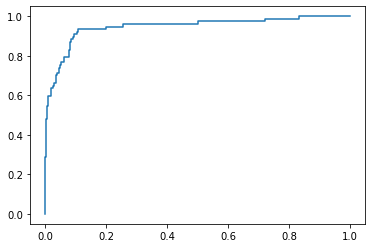

In [26]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# ROC curve
plt.plot(fpr, tpr)

# AUC
auc = np.trapz(tpr, fpr)
print('AUC:', auc)

## 변수선택법

In [27]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [29]:
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)])
            regr = model.fit()
            AIC = regr.aic
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])


'''
단계적 선택법
'''
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [30]:
Forward_best_model = forward_model(X=train_x, y=train_y)
Backward_best_model = backward_model(X=train_x, y=train_y)
Stepwise_best_model = Stepwise_model(X=train_x, y=train_y)

Optimization terminated successfully.
         Current function value: 0.329986
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.284217
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.296731
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330059
         Iterations 6
Processed  9 models on 1 predictors in 0.044567108154296875
Selected predictors: [

Optimization terminated successfully.
         Current function value: 0.330062
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.322763
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327824
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.205738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329912
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.330059
         Iterations 6
Processed  9 models on 1 predictors in 0.03042316436767578
Selected predictors: ['Income', 'const']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7fec20931370>
forward
Optimization terminated successfully.
         Current function value: 0.330076
         Iterations 6
Processed  1 models on 0 predictors in 0.006170988082885742
Selected predictors: ['const

Optimization terminated successfully.
         Current function value: 0.132361
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.132650
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.135373
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.136112
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.142716
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.153670
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.156410
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.218291
         Iterations 8
Processed  8 models on 7 predictors in 0.06036686897277832
Selected predictors: ['Income', 'Education', 'CD Account', 'Family', 'CreditCard', 'Securities Account', 'Online', 'const']  

In [31]:
pred_y_full = results2.predict(test_x2) # full model
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [32]:
pred_Y_full= cut_off(pred_y_full,0.5)
pred_Y_forward = cut_off(pred_y_forward,0.5)
pred_Y_backward = cut_off(pred_y_backward,0.5)
pred_Y_stepwise = cut_off(pred_y_stepwise,0.5)

In [33]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [34]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

0.944
0.944
0.944
0.944


AUC: 0.9465467667547905


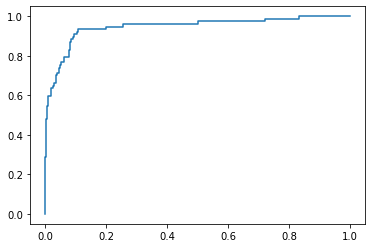

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


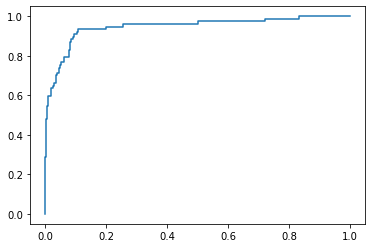

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9489396190733486


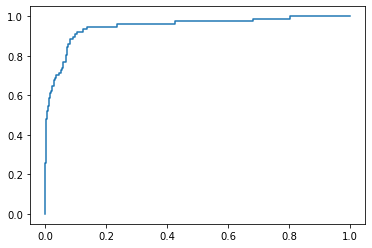

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

AUC: 0.9465467667547905


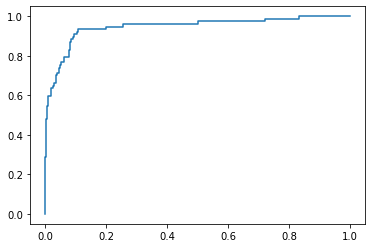

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label=1)
# Print ROC curve
plt.plot(fpr,tpr)
# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

In [39]:
###성능면에서는 네 모델이 큰 차이가 없음
print(len(Forward_best_model.model.exog_names))
print(len(Backward_best_model.model.exog_names))
print(len(Stepwise_best_model.model.exog_names))

10
9
10
